In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import itertools

import keras
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.models import Sequential
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

Using TensorFlow backend.


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
# x_train = np.reshape(x_train,(50000,3072))
# print(x_train.shape)
# x_test = np.reshape(x_test,(10000,3072))

#standardizing
x_train_mean = np.mean(x_train)
x_train_std  = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean) / x_train_std
x_test  = (x_test - x_test_mean) / x_test_std 

print(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1201)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import VGG16

model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model1.add(layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model1.add(Dropout(0.50))
model1.add(layers.Flatten())

model1.add(layers.Dense(512, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.50))

model1.add(layers.Dense(10,activation = 'softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)        

In [5]:
model1.compile(loss='categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])

In [6]:
history1 = model1.fit(x_train, y_train,
           epochs=35,
           batch_size = 100,
           validation_data = (x_validate, y_validate),
           verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/35
40000/40000 [==============================] - 49s 1ms/step - loss: 1.5887 - accuracy: 0.5002 - val_loss: 1.3234 - val_accuracy: 0.5295
Epoch 2/35
40000/40000 [==============================] - 49s 1ms/step - loss: 1.0313 - accuracy: 0.6403 - val_loss: 1.0272 - val_accuracy: 0.6473
Epoch 3/35
40000/40000 [==============================] - 49s 1ms/step - loss: 0.8658 - accuracy: 0.6962 - val_loss: 0.8453 - val_accuracy: 0.7146
Epoch 4/35
40000/40000 [==============================] - 50s 1ms/step - loss: 0.7696 - accuracy: 0.7300 - val_loss: 0.7818 - val_accuracy: 0.7334
Epoch 5/35
40000/40000 [==============================] - 50s 1ms/step - loss: 0.7002 - accuracy: 0.7561 - val_loss: 0.7597 - val_accuracy: 0.7417
Epoch 6/35
40000/40000 [==============================] - 49s 1ms/step - loss: 0.6392 - accuracy: 0.7781 - val_loss: 0.7243 - val_accuracy: 0.7570
Epoch 7/35
40000/40000 [==============================] - 49s 1ms/st

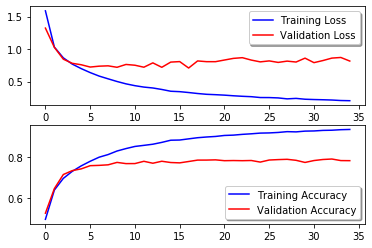

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
axs[0].plot(history1.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(history1.history['val_loss'], color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history1.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(history1.history['val_accuracy'], color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)

In [45]:
loss, accuracy = model1.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model1.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

10000/10000 [==============================] - 3s 280us/step
Validation: accuracy = 0.781000  ;  loss_v = 0.816508
Test: accuracy = 0.784700  ;  loss = 0.818066


In [35]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import layers
from keras import Input
from keras.models import Model

In [42]:
input_layer = Input(shape = (32, 32, 3))

#model1: block1
block1_Conv1 =  layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(input_layer)
block1_MPool1 = layers.MaxPooling2D(2)(block1_Conv1)
block1_Bn1 =    BatchNormalization()(block1_MPool1)

block1_Conv2 =  layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(block1_Bn1)
block1_MPool2 = layers.MaxPooling2D(2)(block1_Conv2)
block1_Bn2 =    BatchNormalization()(block1_MPool2)

#inception block
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(block1_Bn2)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(block1_Bn2)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(block1_Bn2)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
    
output_inception = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

#dense block
dense1_dp1 =    Dropout(0.50)(output_inception)
dense1_flt =    layers.Flatten()(dense1_dp1)

dense1_dense1 = layers.Dense(512, activation = 'relu')(dense1_flt)
dense1_Bn1 =    BatchNormalization()(dense1_dense1)
dense1_dp2 =    Dropout(0.50)(dense1_Bn1)

output_layer = layers.Dense(10,activation = 'softmax')(dense1_dp2)

model2 = Model(inputs = input_layer, outputs = output_layer)
model2.summary()

(None, 8, 8, 128)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_218 (Conv2D)             (None, 32, 32, 32)   896         input_30[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_58 (MaxPooling2D) (None, 16, 16, 32)   0           conv2d_218[0][0]                 
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 16, 16, 32)   128         max_pooling2d_58[0][0]           
__________________________________________________________________________

In [43]:
model2.compile(loss='categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])

In [44]:
history2 = model2.fit(x_train, y_train,
           epochs=35,
           batch_size = 100,
           validation_data = (x_validate, y_validate),
           verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/35
40000/40000 [==============================] - 84s 2ms/step - loss: 1.4213 - accuracy: 0.5204 - val_loss: 1.2153 - val_accuracy: 0.5758
Epoch 2/35
40000/40000 [==============================] - 83s 2ms/step - loss: 0.9560 - accuracy: 0.6659 - val_loss: 0.8099 - val_accuracy: 0.7208
Epoch 3/35
40000/40000 [==============================] - 83s 2ms/step - loss: 0.7973 - accuracy: 0.7212 - val_loss: 0.7800 - val_accuracy: 0.7366
Epoch 4/35
40000/40000 [==============================] - 88s 2ms/step - loss: 0.6932 - accuracy: 0.7582 - val_loss: 0.7097 - val_accuracy: 0.7561
Epoch 5/35
40000/40000 [==============================] - 83s 2ms/step - loss: 0.6178 - accuracy: 0.7851 - val_loss: 0.7251 - val_accuracy: 0.7518
Epoch 6/35
40000/40000 [==============================] - 88s 2ms/step - loss: 0.5519 - accuracy: 0.8065 - val_loss: 0.6599 - val_accuracy: 0.7799
Epoch 7/35
40000/40000 [==============================] - 87s 2ms/st

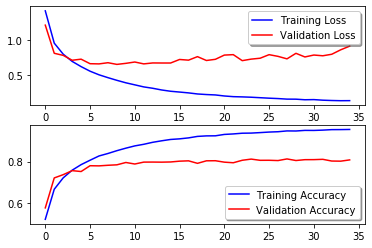

In [81]:
fig, axs = plt.subplots(2,1)
axs[0].plot(history2.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(history2.history['val_loss'], color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history2.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(history2.history['val_accuracy'], color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)

In [46]:
loss, accuracy = model2.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model2.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

10000/10000 [==============================] - 4s 376us/step
Validation: accuracy = 0.808100  ;  loss_v = 0.912779
Test: accuracy = 0.804900  ;  loss = 0.910464


In [82]:
from keras.layers import ReLU
from keras.layers import Add

def relu_bn(inputs):
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x, downsample, filters, kernel_size: int = 3):
    y = Conv2D(kernel_size=kernel_size, strides= (1 if not downsample else 2), filters=filters,padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size, strides=1, filters=filters, padding="same")(y)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size, strides=1, filters=filters, padding="same")(y)
    y = relu_bn(y)

    if downsample:
        x = Conv2D(kernel_size=1, strides=2, filters=filters, padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

def resnet_architecture():
    
    input_layer = Input(shape=(32, 32, 3))
    
    #model1: block2
    block1_Conv1 =  layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(input_layer)
    block1_MPool1 = layers.MaxPooling2D(2)(block1_Conv1)
    block1_Bn1 =    BatchNormalization()(block1_MPool1)

    block1_Conv2 =  layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(block1_Bn1)
    block1_MPool2 = layers.MaxPooling2D(2)(block1_Conv2)
    block1_Bn2 =    BatchNormalization()(block1_MPool2)
    
    #residual block
    output_residual = residual_block(block1_Bn2, downsample=(True), filters=128)
    
    #dense block
    dense1_dp1 =    Dropout(0.50)(output_residual)
    dense1_flt =    layers.Flatten()(dense1_dp1)

    dense1_dense1 = layers.Dense(512, activation = 'relu')(dense1_flt)
    dense1_Bn1 =    BatchNormalization()(dense1_dense1)
    dense1_dp2 =    Dropout(0.50)(dense1_Bn1)

    output_layer = layers.Dense(10,activation = 'softmax')(dense1_dp2)

    model = Model(inputs = input_layer, outputs = output_layer)
    
    return model

model3 = resnet_architecture() # or create_plain_net()
model3.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_57 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 32, 32, 32)   896         input_57[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_113 (MaxPooling2D (None, 16, 16, 32)   0           conv2d_377[0][0]                 
__________________________________________________________________________________________________
batch_normalization_173 (BatchN (None, 16, 16, 32)   128         max_pooling2d_113[0][0]          
___________________________________________________________________________________________

In [83]:
model3.compile(loss='categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])

In [84]:
history3 = model3.fit(x_train, y_train,
           epochs=35,
           batch_size = 100,
           validation_data = (x_validate, y_validate),
           verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/35
40000/40000 [==============================] - 53s 1ms/step - loss: 1.6940 - accuracy: 0.4536 - val_loss: 1.4614 - val_accuracy: 0.5077
Epoch 2/35
40000/40000 [==============================] - 51s 1ms/step - loss: 1.0989 - accuracy: 0.6198 - val_loss: 0.9663 - val_accuracy: 0.6697
Epoch 3/35
40000/40000 [==============================] - 50s 1ms/step - loss: 0.8806 - accuracy: 0.6931 - val_loss: 0.8310 - val_accuracy: 0.7116
Epoch 4/35
40000/40000 [==============================] - 54s 1ms/step - loss: 0.7419 - accuracy: 0.7401 - val_loss: 0.8294 - val_accuracy: 0.7119
Epoch 5/35
40000/40000 [==============================] - 55s 1ms/step - loss: 0.6305 - accuracy: 0.7778 - val_loss: 0.7396 - val_accuracy: 0.7493
Epoch 6/35
40000/40000 [==============================] - 54s 1ms/step - loss: 0.5456 - accuracy: 0.8087 - val_loss: 0.7367 - val_accuracy: 0.7538
Epoch 7/35
40000/40000 [==============================] - 55s 1ms/st

In [85]:
loss, accuracy = model3.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model3.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

10000/10000 [==============================] - 4s 409us/step
Validation: accuracy = 0.766500  ;  loss_v = 1.344585
Test: accuracy = 0.764400  ;  loss = 1.371122


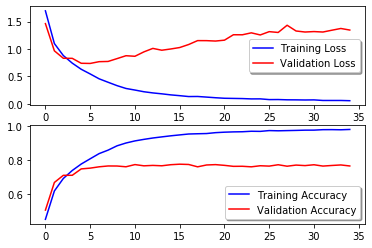

In [86]:
fig, axs = plt.subplots(2,1)
axs[0].plot(history3.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(history3.history['val_loss'], color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history3.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(history3.history['val_accuracy'], color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)